**B. El Punto de Lagrange L1**

El punto de Lagrange L1 del sistema Tierra-Luna es aquel lugar en el que la atracción gravitacional
de estos dos cuerpos actuando sobre una partícula de prueba se combina de tal manera que se logra
un equilibrio con la fuerca centrípeta que mantiene la partícula en su orbita (ver Figura).
1. Asuma que las orbitas son circulares y que la masa de la Tierra es mucho mayor que la de la
Luna (y que la de la partícula de prueba) para mostrar que la distancia r desde el centro de la
Tierra hasta el punto L1 satisface la ecuación
\begin{align}
\frac{GM}{r²} - \frac{Gm}{(R-r)²} = w²r
\end{align}
donde R es la distance entre la Tierra y la Luna, M y m son las masas de la Tierra y de la Luna,
respectivamente, y ω es la velocidad angular de la Luna y la partícula alrededor de la Tierra.
Claramente esta ecuación es un polinomio de orden 5 en r y por ello su solución debe encontrarse
en forma numérica. Escriba un programa que utilice el método de la secante (o Newton-Raphson)
para resolver esta ecuación y encontrar la ubicación del punto L1. Para ello considere los siguientes
parámetros:

* $G = 6,674 × 10^{−11} m³ kg^{−1} s^{−2}$
* $M = 5,974 × 10^{24} kg$
* $m = 7,348 × 10^{22} kg$
* $R = 3,844 × 10^{8} m$
* $ω = 2,662 × 10^{-6} s^{−1}$

In [1]:
#Requerimientos
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import scipy.constants
import scipy.fft as sc

In [2]:
#Constantes dadas por el enunciado
G = scipy.constants.physical_constants['Newtonian constant of gravitation']
M = 5.974e24 #Masa de la tierra en kg
m = 7.348e22 #Masa de la luna en kg
R = 3.844e8 #Distancia tierra - luna
w = 2.662e-6 #Velocidad angular de la Luna y la partícula alrededor de la Tierra 
print(G)

(6.6743e-11, 'm^3 kg^-1 s^-2', 1.5e-15)


Al hacer la sumatoria de fuerzas en el punto estacionario L1 se tiene que,
\begin{align}
\frac{GM}{r²} - \frac{Gm}{(R-r)²} = w²r
\end{align}
Esto también puede ser expresado como,
\begin{align}
w²r - \frac{GM}{r²} + \frac{Gm}{(R-r)²} = 0
\end{align}
Resolviendo el binomio cuadrado,
\begin{align}
w²(R²r - 2Rr² + r³) - GM(\frac{R²}{r²} - \frac{2R}{r} + 1) + Gm = 0
\end{align}
Organizando los términos, finalmente el polinomio puede ser expresado como,
\begin{align}
w²r⁵ - 2w²Rr⁴ + w²R²r³ + (Gm - GM)r² + 2GMRr - GMR² = 0
\end{align}
EL cual es claramente un polinomio de orden 5 en r.

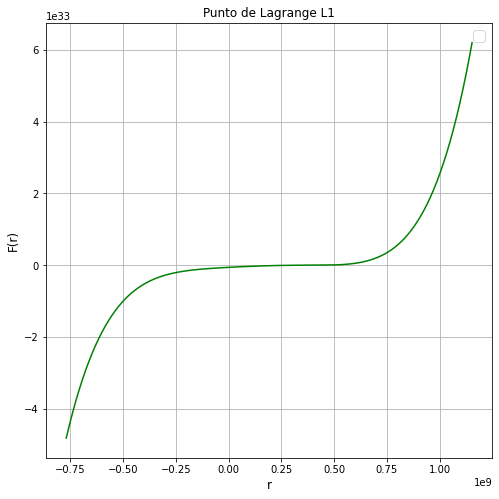

In [5]:
#Definición de la función
F=lambda r1:(w**2)*r1**5 - 2*R*w**2*r1**4 + R**2*w**2*r1**3 + (G[0]*m - G[0]*M)*r1**2 + 2*G[0]*M*R*r1 - G[0]*M*R**2

#Creación de la lista respecto a la cual se graficará
r=np.linspace(-2*R,3*R,1000)
Y=F(r)

#Gráfica de la función
plt.figure(figsize=(8,8))
plt.plot(r,Y,color='g')
plt.legend(fontsize=15)
#plt.plot([-2*R,3*R],[0,0],color = 'k', linewidth=1)
plt.xlabel(r'r',fontsize=12)
plt.ylabel(r'F(r)',fontsize=12)
plt.title('Punto de Lagrange L1')
plt.grid()
plt.show()

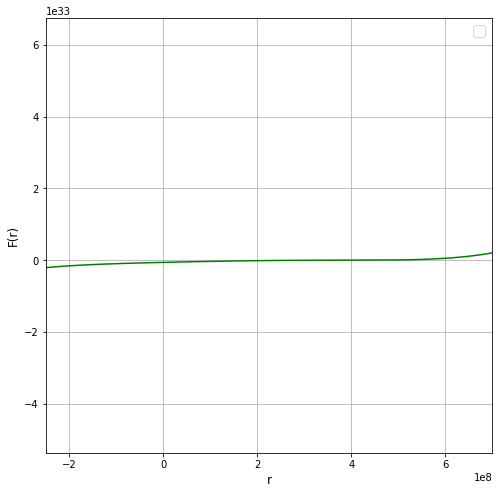

In [4]:
#Acercamiento al intervalo que contiene la raíz
plt.figure(figsize=(8,8))
plt.plot(r,Y,color='g')
#plt.scatter(r, Y, color='black')
plt.legend(fontsize=15)
plt.xlabel(r'r',fontsize=12)
plt.ylabel(r'F(r)',fontsize=12)
plt.xlim(-0.25e9,0.7e9)
plt.grid()
plt.show()

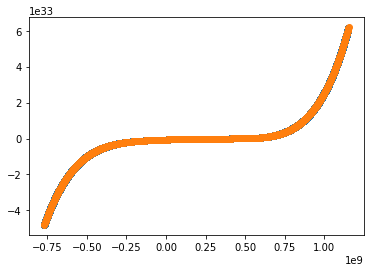

In [7]:
#Búsqueda de raíces

#Función de interpolación cuadratica en un rango de tres puntos
def quadraticInterpolation(x1, x2, x3, f1, f2, f3, X):
    p2 = (((X-x2)*(X-x3))/((x1-x2)*(x1-x3)))*f1 +\
    (((X-x1)*(X-x3))/((x2-x1)*(x2-x3)))*f2 +\
    (((X-x1)*(X-x2))/((x3-x1)*(x3-x2)))*f3
    return p2

#Función de interpolación cuadratica en todo el dominio de puntos
def FinalInterpolation(X,Y):
    BigListY=[]
    BigListX=[]
    for i in range(0,len(Y)-2):
        x_interval = np.linspace(X[i],X[i+1],1000) #Intervalo 
        y_interval = quadraticInterpolation(X[i], X[i+1], X[i+2], Y[i], Y[i+1], Y[i+2], x_interval)
        for j in range(0,len(y_interval)):
            BigListY.append(y_interval[j])
            BigListX.append(x_interval[j])
    return [BigListX,BigListY]. 

CO=FinalInterpolation(r,Y)
f=CO[1]

In [9]:
#Intervalo cercano a la raíz
for i in range(len(Y)-1):
    if Y[i]>=1:
        a=i
        break

x_int =[r[a], r[a+1], r[a+2]]
Y_int =[Y[a], Y[a+1], Y[a+2]]

print('a = ', a, ': r_a = ', r[a], ': f(r_a) = ', Y[a])
print('a = ', a+1, ': r_a = ', r[a+1], ': f(r_a) = ', Y[a+1])

a =  570 : r_a =  327836636.6366365 : f(r_a) =  5.025572835946906e+28
a =  571 : r_a =  329760560.56056046 : f(r_a) =  1.0154766920236092e+29


In [15]:
#Método de Newton-Raphson 
root0 = r[a-1]
root = r[a]

while np.abs(F(root))>1e-10:
    new_root = root - F(root)*(root - root0)/(F(root) - F(root0))
    root0, root = root, new_root

print(f'El punto de Lagrange L1 se encuentra a {root:.8f} m') 
print(f'ya que la función da un valor de f(x_r) =  {F(root):.8e}')

El punto de Lagrange L1 se encuentra a 326046378.76390421 m
ya que la función da un valor de f(x_r) =  0.00000000e+00


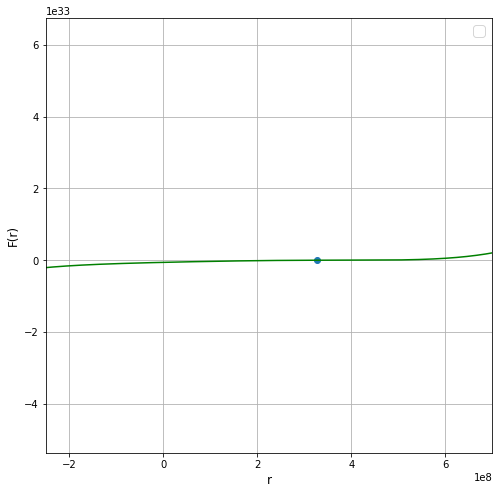

In [11]:
#Gráfica del punto de Lagrange L1
plt.figure(figsize=(8,8))
plt.plot(r,Y,color='g')
plt.legend(fontsize=15)
plt.xlabel(r'r',fontsize=12)
plt.ylabel(r'F(r)',fontsize=12)
plt.scatter(root,F(root))
plt.xlim(-0.25e9,0.7e9)
plt.grid()
plt.show()